In [1]:
import pandas as pd
import numpy as np
!pip install yfinance
import yfinance as yf

     |████████████████████████████████| 6.4 MB 7.2 MB/s 
     |████████████████████████████████| 63 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import datetime
now = datetime.datetime.now()
today = str(now.year)+'-'+str(now.month)+'-'+str(now.day)
print(today)

2022-2-22


In [21]:
name = 'SPY'
df = yf.download('SPY', start='2010-01-01', end=today)

[*********************100%***********************]  1 of 1 completed


In [22]:
Jan = []
Feb = []
Mar = []
Apr = []
May = []
June = []
July = []
Aug = []
Sept = []
Oct = []
Nov = []
Dec = []

def get_returns(month,returns):
  if month == '01':
    Jan.append(float(returns))
  elif month == '02':
    Feb.append(float(returns))
  elif month == '03':
    Mar.append(float(returns))
  elif month == '04':
    Apr.append(float(returns))
  elif month == '05':
    May.append(float(returns))
  elif month == '06':
    June.append(float(returns))
  elif month == '07':
    July.append(float(returns))  
  elif month == '08':
    Aug.append(float(returns))
  elif month == '09':
    Sept.append(float(returns))
  elif month == '10':
    Oct.append(float(returns))
  elif month == '11':
    Nov.append(float(returns))
  elif month == '12':
    Dec.append(float(returns))
  else:
    print("Something went wrong")

In [23]:
DSR = df['Close'].pct_change(1)
df['DSR'] = DSR
df=df[1:]

In [24]:
for i in range(0, len(df)):
  df_date = str(df.index[i])
  df_returns = df['DSR'][i]
  df_month = df_date.split('-')[1]
  get_returns(df_month, df_returns)


In [25]:
def avg_month(month):
  return [sum(month)/len(month)]

In [26]:
df_avg = pd.DataFrame()
df_avg['average'] = avg_month(Jan) + avg_month(Feb) + avg_month(Mar) + avg_month(Apr) + avg_month(May) + avg_month(June) + avg_month(July) + avg_month(Aug) + avg_month(Sept) + avg_month(Oct) + avg_month(Nov) + avg_month(Dec) 
df_avg = df_avg.set_index(df_avg.index +1)

Text(0.5, 1.0, 'SPY Worse month to invest average in september 2010')

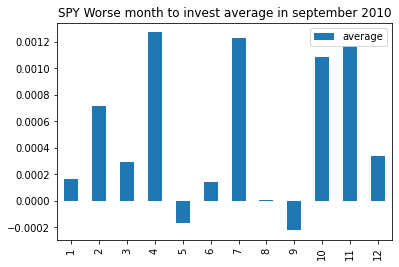

In [28]:
ax = df_avg.plot.bar()
ax.set_title(name + ' Worse month to invest average in september 2010')